# IT441-Data Science Practical 12 (Mini Project)
## Dhrumil Dalwadi
## ID - 18IT027
Description: Simple Analysis of the dataset of Netflix movies and TV Shows

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from collections import Counter
warnings.filterwarnings('ignore')
%matplotlib inline
plt.style.use('fivethirtyeight')

In [3]:
#loading data
data=pd.read_csv('netflix_titles.csv')
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
print(f'There are {data.shape[0]} rows and {data.shape[1]} columns')

There are 8807 rows and 12 columns


In [5]:
data.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [6]:
#Checking the null values:
data.isnull().any()

show_id         False
type            False
title           False
director         True
cast             True
country          True
date_added       True
release_year    False
rating           True
duration         True
listed_in       False
description     False
dtype: bool

In [7]:
#Changing the date added and release_year to date:
data['date_added']=pd.to_datetime(data['date_added'])
data['release_year']=pd.to_datetime(data['release_year'],format="%Y")
data['release_year']=data['release_year'].dt.year

In [8]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [9]:
#Check the number of titles present in the dataset:

print(f'There are {data.show_id.nunique()} shows in the netflix dataset')

There are 8807 shows in the netflix dataset


In [10]:
(data['type'].value_counts()/data.shape[0])*100

Movie      69.615079
TV Show    30.384921
Name: type, dtype: float64

Almost 70% of the titles are movies and 30% are TV Shows

In [12]:
data['year_added']=data['date_added'].dt.year
data['month_added']=data['date_added'].dt.month
data['year_added'].value_counts().sort_index()

2008.0       2
2009.0       2
2010.0       1
2011.0      13
2012.0       3
2013.0      11
2014.0      24
2015.0      82
2016.0     429
2017.0    1188
2018.0    1649
2019.0    2016
2020.0    1879
2021.0    1498
Name: year_added, dtype: int64

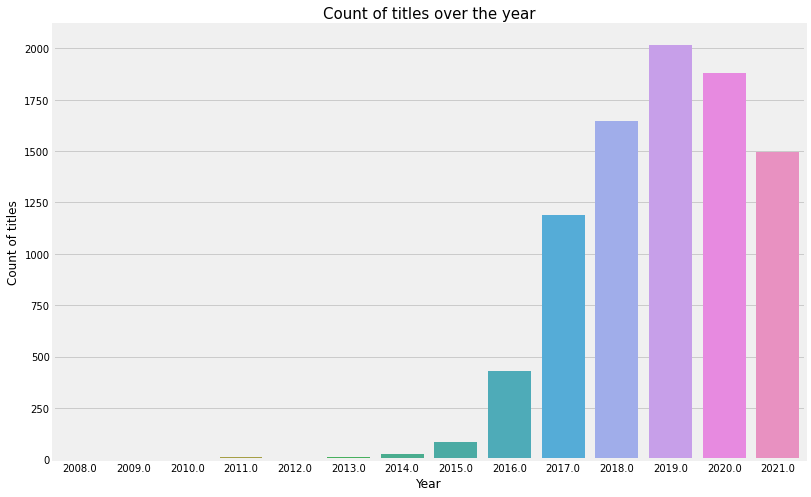

In [13]:
plt.figure(figsize=(12,8))
sns.countplot(x='year_added',data=data)
plt.ylabel('Count of titles',fontsize=12)
plt.xlabel('Year',fontsize=12)
plt.title("Count of titles over the year",fontsize=15)
plt.show()

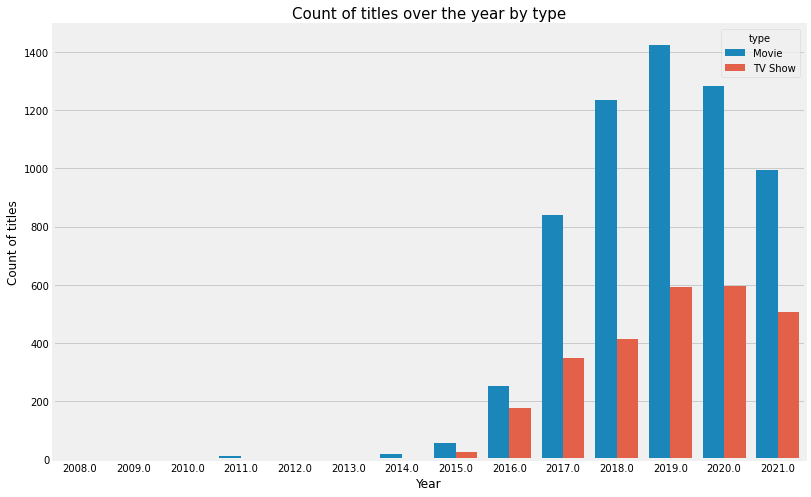

In [14]:
plt.figure(figsize=(12,8))
sns.countplot(x='year_added',data=data,hue='type')
plt.ylabel('Count of titles',fontsize=12)
plt.xlabel('Year',fontsize=12)
plt.title("Count of titles over the year by type",fontsize=15)
plt.show()

In [15]:
tvshow=data[data['type']=='TV Show']['year_added'].value_counts().sort_index()
tvshow.pct_change()

2008.0         NaN
2013.0    4.000000
2014.0    0.000000
2015.0    4.200000
2016.0    5.769231
2017.0    0.982955
2018.0    0.180516
2019.0    0.436893
2020.0    0.005068
2021.0   -0.151261
Name: year_added, dtype: float64

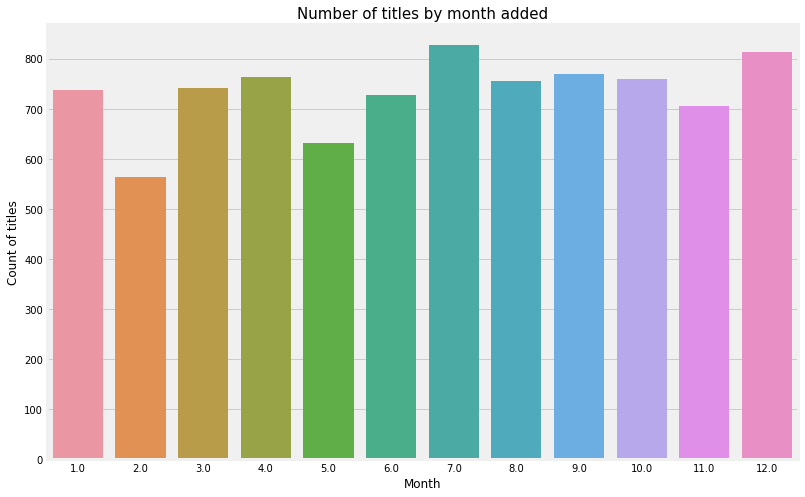

In [16]:
plt.figure(figsize=(12,8))
sns.countplot(x='month_added',data=data)
plt.ylabel("Count of titles",fontsize=12)
plt.xlabel("Month",fontsize=12)
plt.title("Number of titles by month added",fontsize=15)
plt.show()

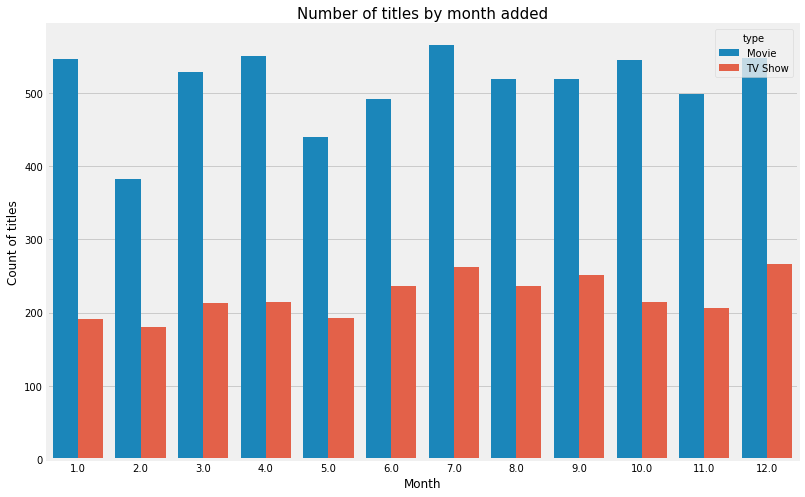

In [17]:
plt.figure(figsize=(12,8))
sns.countplot(x='month_added',data=data,hue='type')
plt.ylabel("Count of titles",fontsize=12)
plt.xlabel("Month",fontsize=12)
plt.title("Number of titles by month added",fontsize=15)
plt.show()

In [18]:
data['listed_in']=data['listed_in'].astype('str')
data['num_listing']=data['listed_in'].apply(lambda x:len(x.split(",")))

In [19]:
listing=set()
count_listings=Counter()

for listings in data['listed_in']:
    listings=listings.split(",")
    listing.update([lst.strip() for lst in listings])
    for lst in listings:
        count_listings[lst.strip()]+=1

In [21]:
listings_title=pd.DataFrame.from_dict(count_listings,orient='index')
listings_title.sort_values(0,ascending=False,inplace=True)
listings_title.rename(columns={0:'count'},inplace=True)
data['num_listing'].describe()

count    8807.000000
mean        2.194050
std         0.784341
min         1.000000
25%         2.000000
50%         2.000000
75%         3.000000
max         3.000000
Name: num_listing, dtype: float64

In [22]:
print(f'There are {len(listings_title)} genres in the database')

There are 42 genres in the database


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

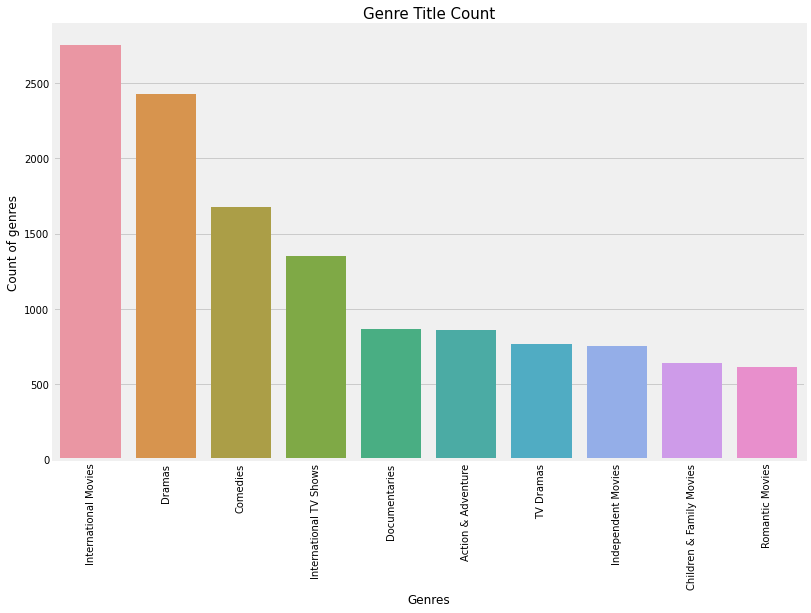

In [23]:
#Top 10 genre titles available:

plt.figure(figsize=(12,8))
sns.barplot(x=listings_title[:10].index,y='count',data=listings_title[:10])
plt.ylabel("Count of genres",fontsize=12)
plt.xlabel("Genres",fontsize=12)
plt.title("Genre Title Count",fontsize=15)
plt.xticks(rotation=90)

In [24]:
data['rating'].value_counts()

TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
UR             3
NC-17          3
66 min         1
84 min         1
74 min         1
Name: rating, dtype: int64

TV-MA and TV-14 are the most common ratings available in this database.

In [25]:
data.groupby('type')['rating'].value_counts()

type     rating  
Movie    TV-MA       2062
         TV-14       1427
         R            797
         TV-PG        540
         PG-13        490
         PG           287
         TV-Y7        139
         TV-Y         131
         TV-G         126
         NR            75
         G             41
         TV-Y7-FV       5
         NC-17          3
         UR             3
         66 min         1
         74 min         1
         84 min         1
TV Show  TV-MA       1145
         TV-14        733
         TV-PG        323
         TV-Y7        195
         TV-Y         176
         TV-G          94
         NR             5
         R              2
         TV-Y7-FV       1
Name: rating, dtype: int64